<a href="https://colab.research.google.com/github/Msanjayds/DataScience_Concepts_and_Other_Useful_Resources/blob/master/6.%20Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Polynomial Regression:

It is used to fit a regression model to a non linear data. visualize the non linear relationship and try to fit a polnomial function. 


In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

loan_df = pd.read_csv('https://raw.githubusercontent.com/Msanjayds/DataScience_Concepts_and_Other_Useful_Resources/master/Datasets/loan_analysis_summary.csv')
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


### What we can see is the cusomers with better income score will have lower dti (debt to income ratio) and we could see very less correction or almost no correlation since it is nearer to zero between fico_score and loan_total.For ordinal data spearman coeffecient is better. Ficoscore is considered as ordinal here.


In [3]:
loan_df[['fico_score','loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


# we can see that the ouput is completely non linear, that is why the corr coeff is zero. Hypothetically we can model it using the polynomial regression. It allows for a linear combination of input variables and those input variables will be raised to varying degrees. we are going to create multiple others vars like x2, x3 etc depends on the number of curves in the map.



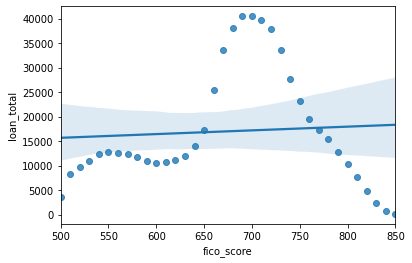

In [4]:
sns.regplot(x='fico_score', y='loan_total', data=loan_df)

# we used plynombial function from the numpy and tryied  and degree of polynomial as 5, becuase we have 4 bends above and we need to add 1 to it and fit. We can see that it tried to fit the model closely. 

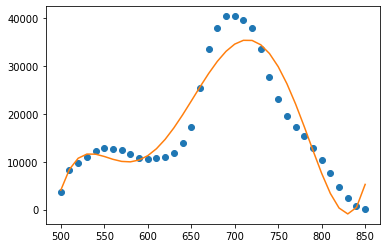

In [5]:
coeff = np.poly1d(np.polyfit(loan_df['fico_score'],loan_df['loan_total'],5))

t = loan_df['fico_score']

plt.plot(loan_df['fico_score'], loan_df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

# a polynomial function might ovefit , we should have seperate testing and validation set to validate it. A polynomial regression moldels a relationship between the independent variable and the dependent variable as an nth degree polynomial, in our case it is 5 degree polynomial and below are the coefficients.

In [6]:
coeff

poly1d([ 6.00037793e-07, -1.99259784e-03,  2.61951319e+00, -1.70446336e+03,
        5.49180402e+05, -7.01232540e+07])

#Lets correlate Debt to incoe ratio and Loan total and it shows that there is no correlation as the corr_coeff is close to zero.


In [7]:
loan_df[['dti','loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


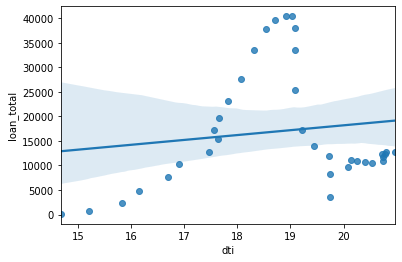

In [9]:

sns.regplot(x='dti', y='loan_total', data=loan_df)

### As we can see above i tried to fit a straight line, we could see that the data is completely random at the end (it is a noice in the data). Lets try to fit a polynomial regression using a scikit learn polynomialfeature.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [0]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(loan_df[['dti']])

In [14]:
model = LinearRegression()
model.fit(x_poly, loan_df['loan_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(x_poly)

In [17]:
model.coef_

array([ 0.00000000e+00, -1.33678762e+07,  1.11964965e+06, -4.13729904e+04,
        5.69311839e+02])

In [18]:
model.intercept_

59406562.5868831

#Lets plot the fitted line and see how it looks

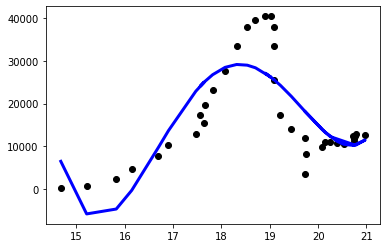

In [22]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
plt.plot(loan_df['dti'], y_pred, color='blue', linewidth=3)

## This cannot be modeled easily as polynomial terms as well, we need to try some feature engineering, standerdize the data, segement it adn then try ..thank you